In [1]:
import numpy as np
from gym_sokoban.envs import SokobanEnv
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def render_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    image = env.render(mode)

    plt.figure(dpi=200) 
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def print_state(env, mode="rgb_array"):
    """Renders the Sokoban environment as image and displays it."""
    print(env.room_state)

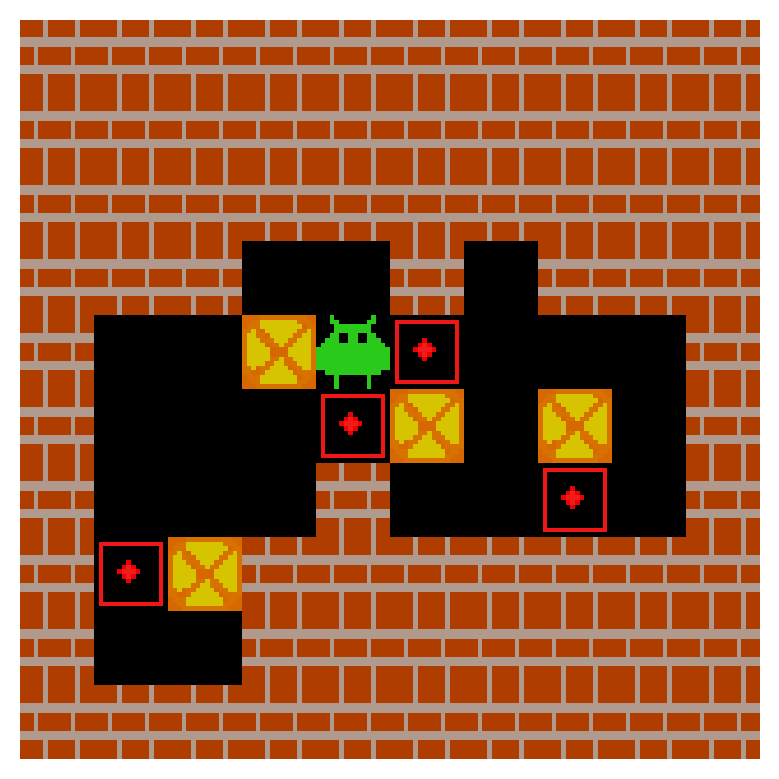

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 5 2 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [3]:
class SokobanEnvFixated(SokobanEnv):     
    def reset(self, second_player=False, render_mode='rgb_array'):

        self.room_fixed = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 1, 1, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 1, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.room_state = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    [0, 1, 1, 4, 5, 2, 1, 1, 1, 0],
                                    [0, 1, 1, 1, 2, 4, 1, 4, 1, 0],
                                    [0, 1, 1, 1, 0, 1, 1, 2, 1, 0],
                                    [0, 2, 4, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
                                    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
        self.box_mapping = {(6, 7): (5, 7), (5, 4): (5, 5), (4, 5): (4, 3), (7, 1): (7, 2)}

        self.player_position = np.argwhere(self.room_state == 5)[0]
        self.num_env_steps = 0
        self.reward_last = 0
        self.boxes_on_target = 0

        starting_observation = self.render(render_mode)
        return starting_observation
  
env = SokobanEnvFixated(dim_room=(5, 5), max_steps=40, num_boxes=2, num_gen_steps=None, reset=True)
render_state(env)
print_state(env)

In [4]:
UP, DOWN, LEFT, RIGHT = 1, 2, 3, 4

def doStep(step):
    env.step(step)
    render_state(env)
    print_state(env)

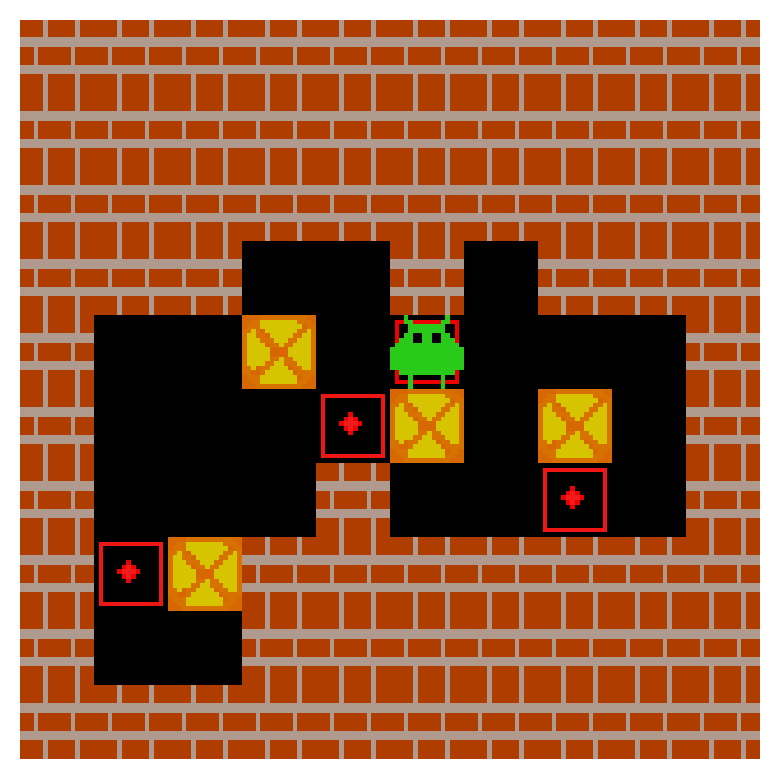

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 5 1 1 1 0]
 [0 1 1 1 2 4 1 4 1 0]
 [0 1 1 1 0 1 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [5]:
# ChatGPT-4o
# Question:     Can you give me the next action (UP, DOWN, LEFT, RIGHT) to solve this Sokoban game?
#               All the boxes(4) must be pushed from the player(5) on to the buttons (2) over the empty spaces (1) avoiding the walls (0).
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 5 2 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
# Answer:       The player's current position is at (4,4), and they need to push the boxes (4) onto the buttons (2).
#               
#               The best next move is RIGHT, pushing the box at (4,5) onto the button (2) at (5,5).
#               
#               Let me know if you want further steps! 🚀
doStep(RIGHT)

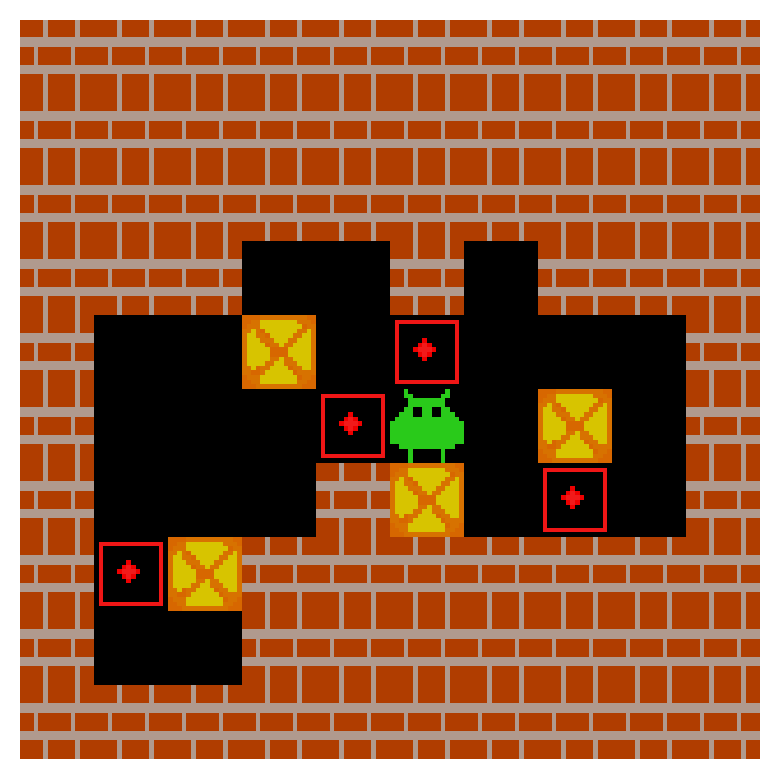

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 5 1 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [6]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 5 1 1 1 0]
#                [0 1 1 1 2 4 1 4 1 0]
#                [0 1 1 1 0 1 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (4,5).
#               
#               The best next move is DOWN, pushing the box at (5,5) onto the button (2) at (5,5).
#               
#               Let me know if you need more guidance! 🚀

doStep(DOWN)

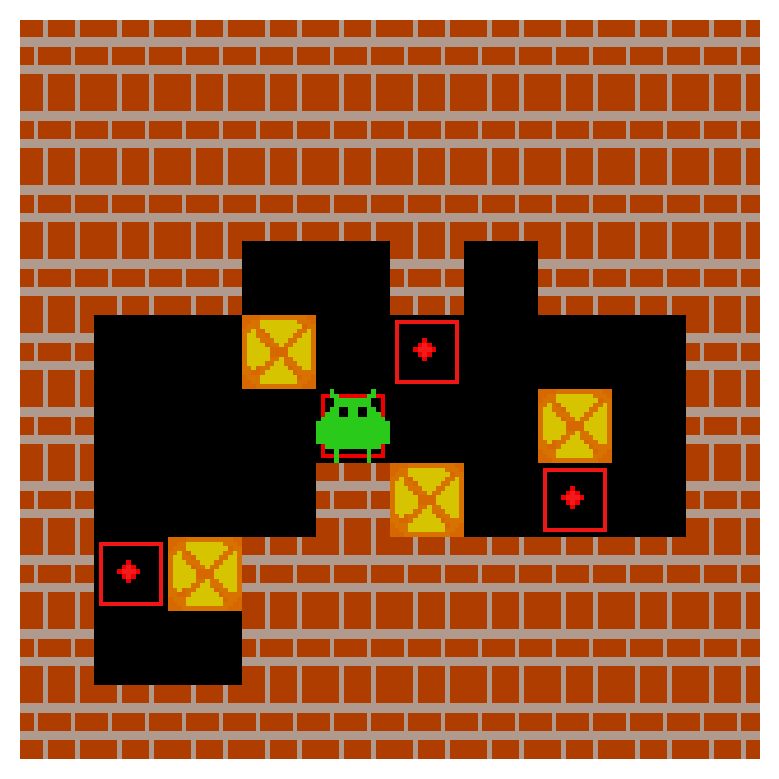

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 5 1 1 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [7]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 5 1 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,5).  
#               
#               The best next move is **LEFT**, moving to (5,4) to position yourself for the next box push.  
#               
#               Let me know if you need more help! 🚀

doStep(LEFT)

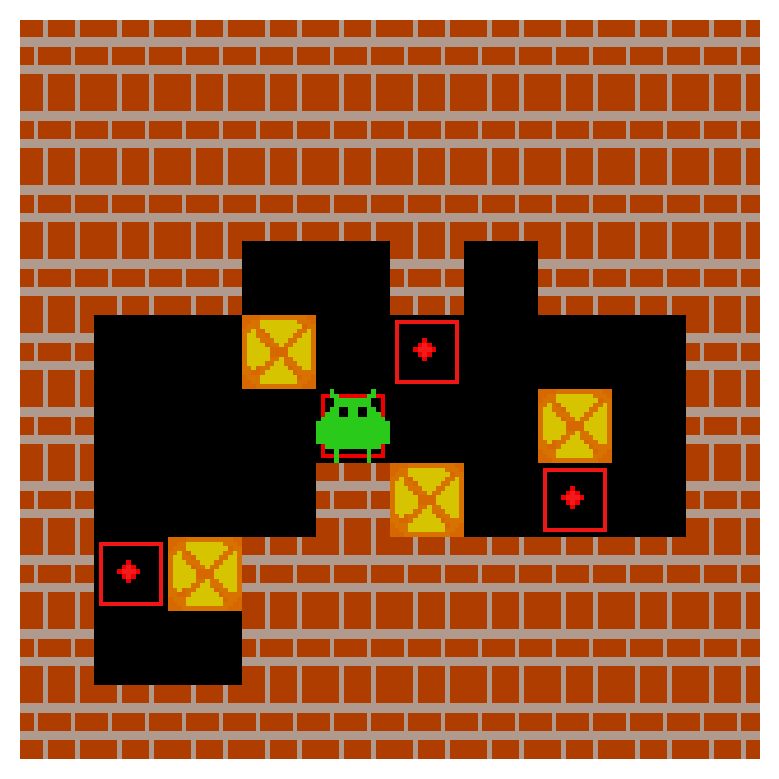

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 5 1 1 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [8]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 5 1 1 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,4).
#               
#               The best next move is DOWN, moving to (6,4), so you can push the box at (6,5) onto a button later.
#               
#               Let me know if you need more help! 🚀

doStep(DOWN)

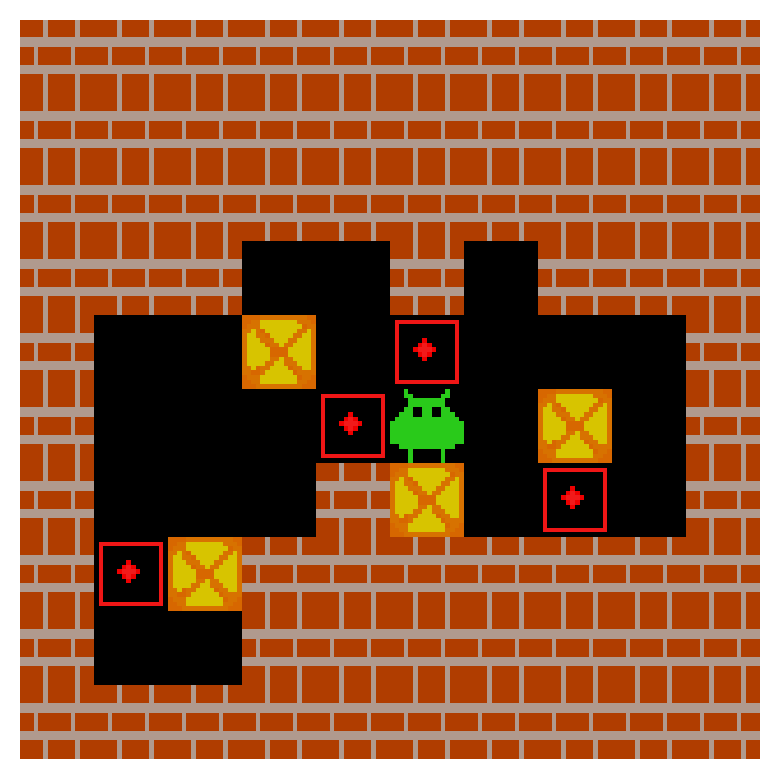

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 5 1 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [9]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 5 1 1 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       It looks like the game state didn't change after your last move. The player is still at (5,4).  
#               
#               The best move now is **RIGHT**, moving back to (5,5), so you can position yourself to push another box.  
#               
#               Let me know if you need more help! 🚀

doStep(RIGHT)

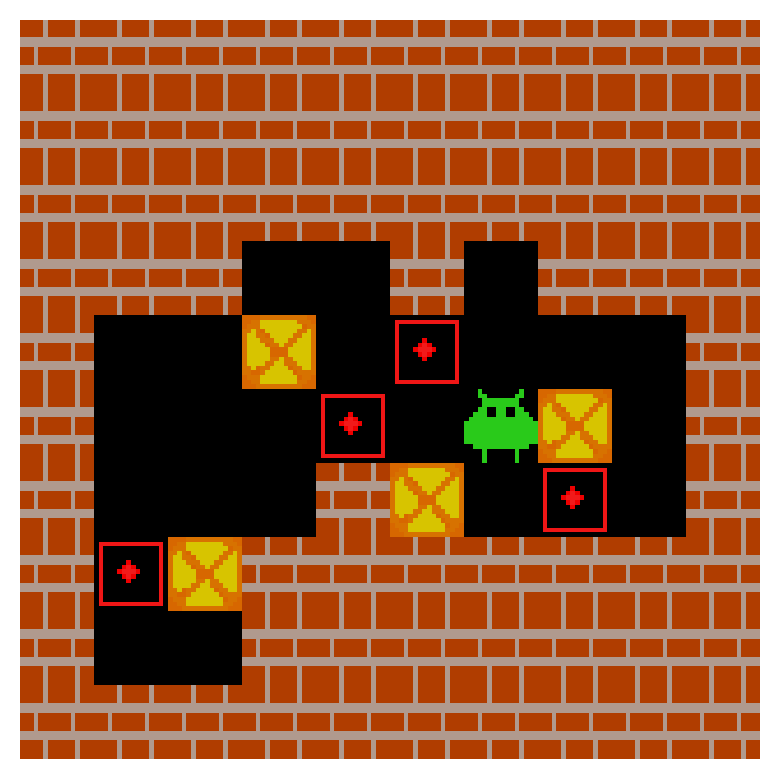

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 5 4 1 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [10]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 5 1 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,5).  
#               
#               The best next move is **RIGHT**, pushing the box at (5,7) to (5,8). This will move it closer to an open space for solving.  
#               
#               Let me know if you need more guidance! 🚀

doStep(RIGHT)

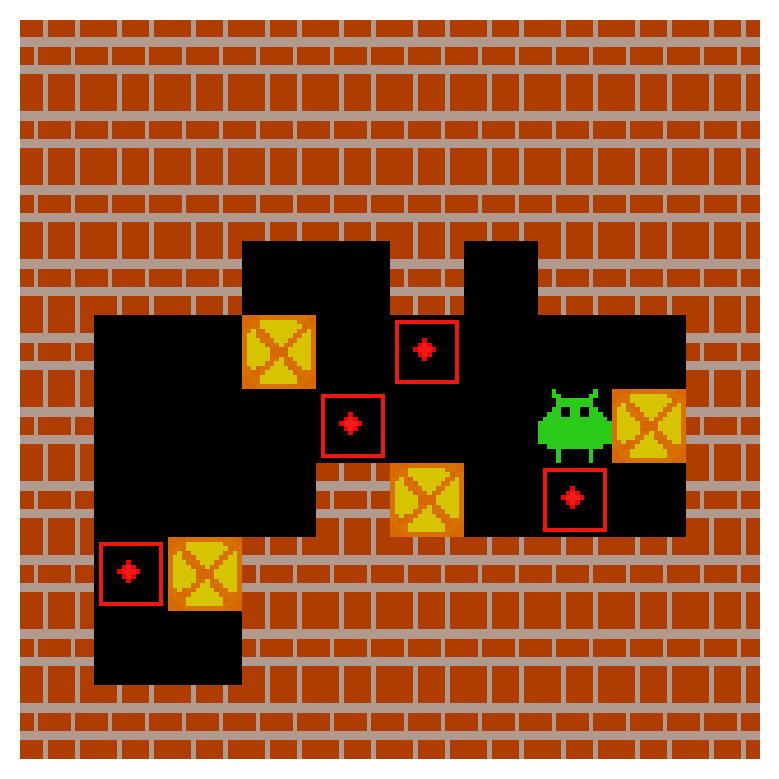

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 1 5 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [11]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 5 4 1 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,6).
#               
#               The best next move is RIGHT, pushing the box at (5,7) onto (5,8). This moves the box into a better position for solving.
#               
#               Let me know if you need further help! 🚀

doStep(RIGHT)

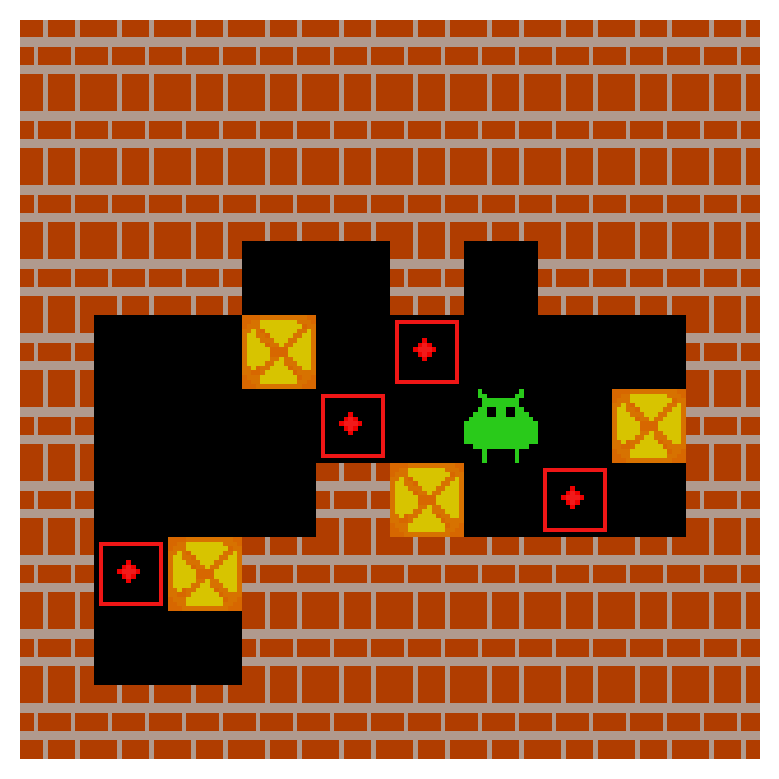

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 1 5 1 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [12]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 1 5 4 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,7).  
#               
#               The best next move is **LEFT**, moving to (5,6) to reposition for further box pushes.  
#               
#               Let me know if you need more help! 🚀

doStep(LEFT)

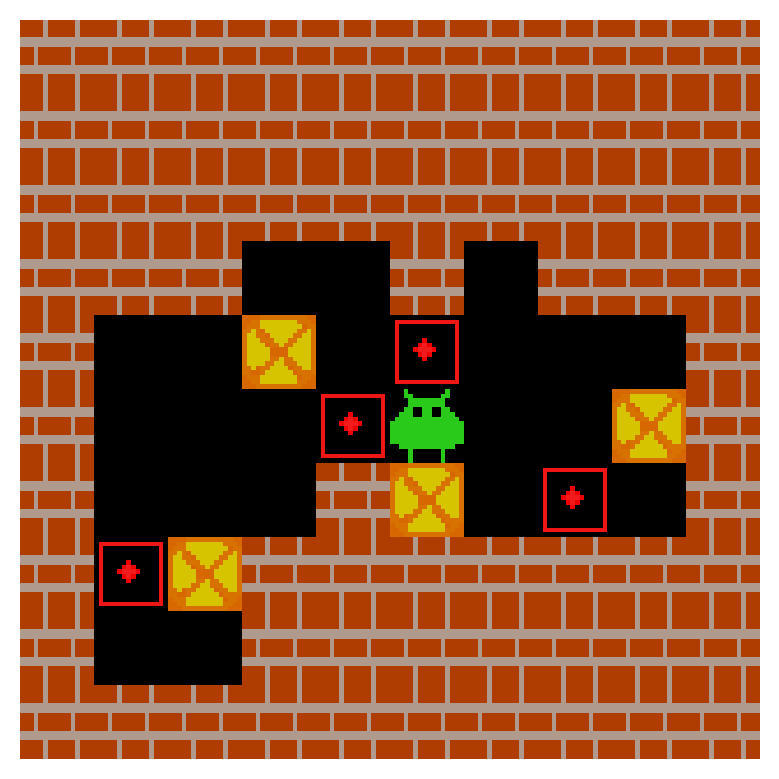

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 2 1 1 1 0]
 [0 1 1 1 2 5 1 1 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [13]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 1 5 1 4 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,6).  
#               
#               The best next move is **LEFT** again, moving to (5,5). This will allow you to reposition and work on pushing other boxes.  
#               
#               Let me know if you need further guidance! 🚀

doStep(LEFT)

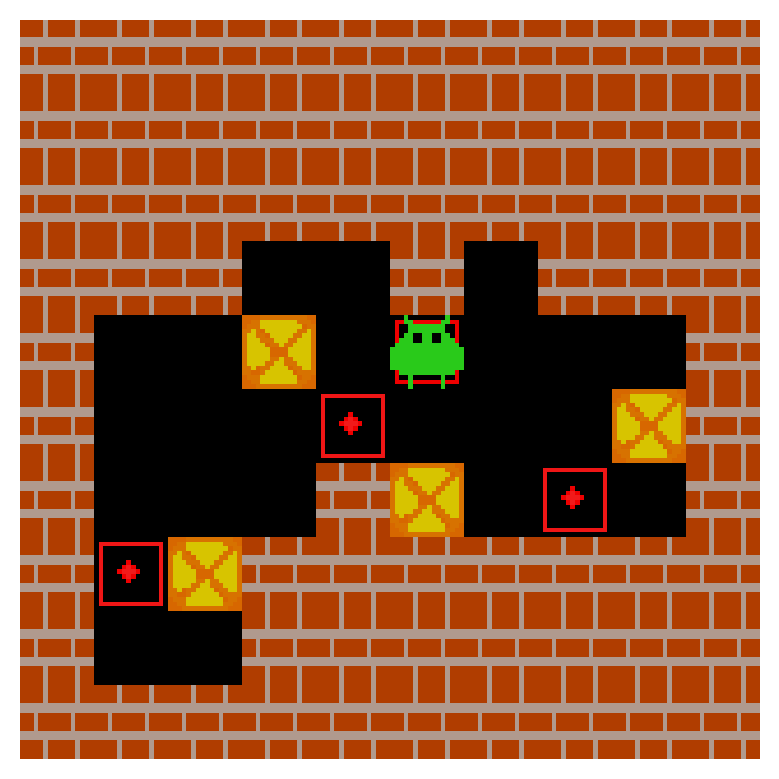

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 1 0 0 0]
 [0 1 1 4 1 5 1 1 1 0]
 [0 1 1 1 2 1 1 1 4 0]
 [0 1 1 1 0 4 1 2 1 0]
 [0 2 4 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [14]:
# Question:     After this action the game now looks like this
#               [[0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]
#                [0 0 0 1 1 0 1 0 0 0]
#                [0 1 1 4 1 2 1 1 1 0]
#                [0 1 1 1 2 5 1 1 4 0]
#                [0 1 1 1 0 4 1 2 1 0]
#                [0 2 4 0 0 0 0 0 0 0]
#                [0 1 1 0 0 0 0 0 0 0]
#                [0 0 0 0 0 0 0 0 0 0]]
#               What would be the next action?
# Answer:       The player's new position is at (5,5).  
#               
#               The best next move is **UP**, moving to (4,5), so you can reposition for future pushes.  
#               
#               Let me know if you need more help! 🚀

doStep(UP)

In [ ]:
# Result:       Two boxes can no longer be positioned correctly. 
#               It seems as if the next possible push action is always taken